In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting beautiful graphs

# train test split from sklearn
from sklearn.model_selection import train_test_split

# Import Torch 
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, models
# from torch.utils.data import SubsetRandomSampler
from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F

# What's in the current directory?
import os

### Declare constant

In [2]:
BATCH_SIZE = 4
folder_mnist = 'mnist'
n_epochs = 2
lr = 1e-6

# Data Processing

## Download data

In [3]:


# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
transform = transforms.ToTensor()

# Load and transform data
trainset = torchvision.datasets.MNIST(folder_mnist, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(folder_mnist, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

## Vizualize the Data

In [4]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Labels:  tensor([6, 5, 4, 3])
Batch shape:  torch.Size([4, 1, 28, 28])


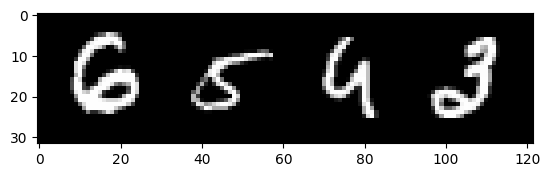

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

# Training Loop

### Declare the Model

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 10)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x.view(BATCH_SIZE, -1)))
        y_pred = self.linear2(h_relu)
        return y_pred

### Implement Training Loop

In [7]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [18]:
losses = []
for t in range(n_epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data


        optimizer.zero_grad()         # Empty gradient

        outputs = model(inputs)       # Implement Forward
        loss = criterion(outputs, labels) # Compute the loss
        loss.backward() # Compute the gradient for each variable
        optimizer.step() # Update the weights according to the computed gradient
        losses.append(loss.item())
        if not i % 2000:
            print(t, i, loss.item())

0 0 1.094968557357788
0 2000 1.1078987121582031
0 4000 1.260049819946289
0 6000 1.3333159685134888
0 8000 1.611464262008667
0 10000 1.1430189609527588
0 12000 0.8537676334381104
0 14000 1.0614573955535889
1 0 1.1745471954345703
1 2000 0.9308956861495972
1 4000 1.0698184967041016
1 6000 0.9795215129852295
1 8000 0.6310036182403564
1 10000 0.642576277256012
1 12000 0.8185365200042725
1 14000 0.775263249874115


### Plot the losses

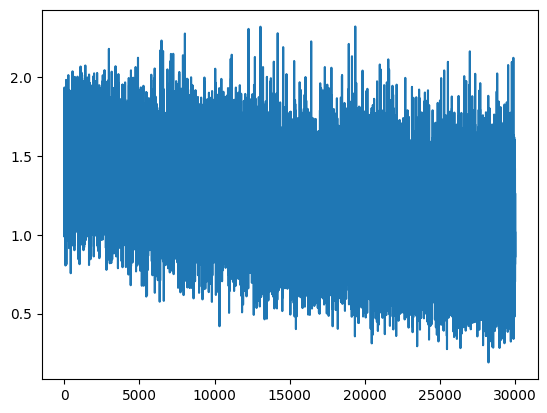

In [19]:
plt.plot(losses)


### Implement Testing 

In [22]:
test_loss

2013.1380966454744

In [32]:
correct = 0
test_loss = 0
for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels) # Compute the loss
        test_loss+= loss.item() / BATCH_SIZE
        _, predicted = torch.max(outputs, 1) 
        correct += (predicted == labels).sum()
final_loss =  test_loss / len(testset) 
final_accuracy = 100 * correct /  len(testset) 


In [33]:
print(f'Final Loss {final_loss} ----- Final Accurracy {final_accuracy}'  )

Final Loss 0.05799198639839888 ----- Final Accurracy 84.0999984741211


# Implement Deployement functions 

In [12]:
def predict(model, images):
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)  # TODO: explain why 1
    return predicted

Prediction:  tensor([7, 2, 1, 0])


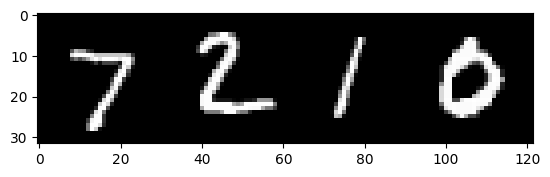

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

show_batch(images)
print('Prediction: ', predict(model, images))